# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.2827,  0.3947,  0.3377,  0.8262,  0.7675,  0.5788,  0.538 ,  0.832 ,  0.7134,  0.7473,
        0.9882,  0.6577,  0.1003,  0.3557,  0.2343,  0.3235,  0.8236,  0.5532,  0.542 ,  0.6502,
        0.0181,  0.7038,  0.2955,  0.2411,  0.7834,  0.1882,  0.5029,  0.8227,  0.2787,  0.5907])

In [6]:
y

array([  8.848 ,   9.184 ,   9.0131,  10.4786,  10.3026,   9.7364,   9.6139,  10.4959,  10.1403,
        10.2419,  10.9647,   9.9732,   8.3008,   9.0672,   8.703 ,   8.9705,  10.4708,   9.6597,
         9.626 ,   9.9505,   8.0542,  10.1115,   8.8866,   8.7233,  10.3501,   8.5646,   9.5087,
        10.4682,   8.8362,   9.772 ])

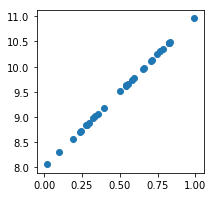

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.1444

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [12]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani